In [1]:
#Import the required libraries
import pandas as pd
import numpy as np

np.random.seed(7)

from keras. models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
from keras.preprocessing import image
import os
import shutil
import matplotlib.pyplot as plt
from tqdm import tqdm
import keras
from sklearn.model_selection import train_test_split
from tensorflow.random import set_seed


Using TensorFlow backend.


In [0]:
#Set up synchronization with google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/plant-pathology-2020-fgvc7/train.csv')

In [5]:
df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [6]:
df.describe()

,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


As you can see, the classes are not balanced, this is noticeable by the average value, as well as simply by the number of classes in the variable train_sum

In [7]:
train_sum = df[['healthy', 'multiple_diseases', 'rust', 'scab']].sum(axis=0)
train_sum

healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64

In [0]:
img_shape = 300

In [0]:
X = []

Download the image database

In [10]:
for i in tqdm(range(df.shape[0])):
  path = '/content/drive/My Drive/plant-pathology-2020-fgvc7/images/' + df['image_id'][i]+'.jpg'
  img = image.load_img(path,target_size=(img_shape,img_shape,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)
X = np.array(X)

100%|██████████| 1821/1821 [15:46<00:00,  1.92it/s]


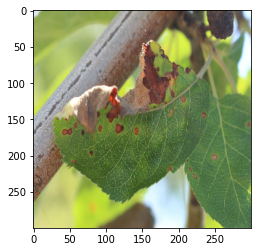

In [11]:
plt.imshow(X[1])

In [12]:
X.shape

(1821, 300, 300, 3)

In [13]:
y = df.drop(['image_id'],axis=1)
y = y.to_numpy()
y.shape

(1821, 4)

We calculate the weight for each class

In [0]:
#We break the sample into training and test

In [0]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.20)

In [15]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',np.unique(y_train.argmax(axis=1)),y_train.argmax(axis=1))
print('class weights: ', class_weights)

class weights:  [0.8708134  4.85333333 0.728      0.78617711]


In [16]:
#load the weights into the dictionary for transfer to the keras model
class_weights_dict = dict(zip(range(4),class_weights))
print(class_weights_dict)

{0: 0.8708133971291866, 1: 4.8533333333333335, 2: 0.728, 3: 0.7861771058315334}


In [17]:
#check the distribution of weights for the test sample
from sklearn.utils.class_weight import compute_class_weight
class_weigths = compute_class_weight('balanced',np.unique(y_test.argmax(axis=1)),y_test.argmax(axis=1))
print('class weights: ', class_weights)

class weights:  [0.8708134  4.85333333 0.728      0.78617711]


#Model with DropOut

* Add 4 convolutional layers, with a 3x3 kernel.
* MaxPool will use 2x2.
* Add 2 Dance layers with 256 neurons and Denсe with 4 output neurons
* We will use the activation functions relu, on the output layer we use softmax
* BatchSize take equal to 25%.



In [0]:
set_seed(np.random.seed(123))
model = Sequential()

model.add(Conv2D(32,(3,3),strides=2,activation='relu',input_shape=(300,300,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(4,activation='softmax'))


In [0]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])                                                                       

In [23]:
path_model_dropout = '/content/drive/My Drive/plant-pathology-2020-fgvc7/models_dropout/'
history = model.fit(X_train,y_train, epochs=30, batch_size=32, class_weight={0:1, 1:5, 2:1, 3:1}, validation_data=(X_test,y_test))



Train on 1456 samples, validate on 365 samples
Epoch 1/30
1456/1456 [==============================] - 54s 37ms/step - loss: 1.7132 - accuracy: 0.3255 - val_loss: 1.2804 - val_accuracy: 0.3562
Epoch 2/30
1456/1456 [==============================] - 55s 38ms/step - loss: 1.6844 - accuracy: 0.3400 - val_loss: 1.3462 - val_accuracy: 0.3507
Epoch 3/30
1456/1456 [==============================] - 53s 36ms/step - loss: 1.6686 - accuracy: 0.3647 - val_loss: 1.3505 - val_accuracy: 0.3425
Epoch 4/30
1456/1456 [==============================] - 53s 36ms/step - loss: 1.6459 - accuracy: 0.3929 - val_loss: 1.3179 - val_accuracy: 0.4301
Epoch 5/30
1456/1456 [==============================] - 53s 36ms/step - loss: 1.6437 - accuracy: 0.4087 - val_loss: 1.2851 - val_accuracy: 0.4932
Epoch 6/30
1456/1456 [==============================] - 53s 36ms/step - loss: 1.5791 - accuracy: 0.4629 - val_loss: 1.2074 - val_accuracy: 0.6411
Epoch 7/30
1456/1456 [==============================] - 53s 36ms/step - loss:

build precision graphs and loss


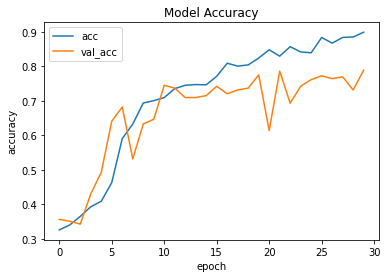

In [43]:
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'], loc='upper left')
plt.show()

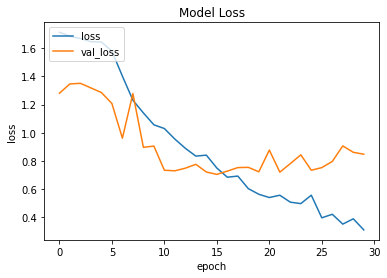

In [44]:
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

save the model and calculate the Precision and Recall

In [0]:
model.save(path_model_dropout+'model1.h5')


In [0]:
from keras.models import load_model
model_new = load_model('/content/drive/My Drive/plant-pathology-2020-fgvc7/models_dropout/model1.h5')

In [0]:
model_new.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=[keras.metrics.Precision(class_id=0,name='Precision_0'),
                                                                                   keras.metrics.Precision(class_id=1,name='Precision_1'),
                                                                                   keras.metrics.Precision(class_id=2,name='Precision_2'),
                                                                                   keras.metrics.Precision(class_id=3,name='Precision_3'),
                                                                                   keras.metrics.Recall(class_id=0, name='Recall_0'),
                                                                                   keras.metrics.Recall(class_id=1, name='Recall_1'),
                                                                                   keras.metrics.Recall(class_id=2, name='Recall_2'),
                                                                                   keras.metrics.Recall(class_id=3, name='Recall_3'),
                                                                                   'accuracy'])

                                                                                   
   

In [29]:
model_new_pre_rec_acc = model_new.evaluate(X_test, y_test)
model_new_pre_rec_acc
print('\nHealthy Precision:',model_new_pre_rec_acc[1], 'Recall:',model_new_pre_rec_acc[5],'\n\n',
      'Multiple_diseases Precision:',model_new_pre_rec_acc[2], 'Recall:',model_new_pre_rec_acc[6],'\n\n',
      'Rust Precision:',model_new_pre_rec_acc[3], 'Recall:',model_new_pre_rec_acc[7],'\n\n',
      'Scab Precision:',model_new_pre_rec_acc[4], 'Recall:',model_new_pre_rec_acc[8],'\n\n',
      'Total Accuracy in Test_Data:', model_new_pre_rec_acc[9]
     )

365/365 [==============================] - 3s 9ms/step

Healthy Precision: 0.6785714030265808 Recall: 0.7755101919174194 

 Multiple_diseases Precision: 0.25 Recall: 0.1875 

 Rust Precision: 0.9655172228813171 Recall: 0.9180327653884888 

 Scab Precision: 0.8070175647735596 Recall: 0.713178277015686 

 Total Accuracy in Test_Data: 0.7890411019325256


#Model whithout DropOut

In [0]:
set_seed(np.random.seed(123))
model2 = Sequential()

model2.add(Conv2D(32,(3,3),strides=2,activation='relu',input_shape=(300,300,3)))
model2.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.25))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.25))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.25))

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(256,activation='relu'))
#model.add(Dropout(0.25))


model2.add(Dense(4,activation='softmax'))

In [0]:
model2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy']) 

In [35]:
path_model_dropout = '/content/drive/My Drive/plant-pathology-2020-fgvc7/models_dropout/'
history2 = model2.fit(X_train,y_train, epochs=30, batch_size=32, class_weight={0:1, 1:5, 2:1, 3:1}, validation_data=(X_test,y_test))

Train on 1456 samples, validate on 365 samples
Epoch 1/30
1456/1456 [==============================] - 49s 34ms/step - loss: 1.8006 - accuracy: 0.3386 - val_loss: 1.3621 - val_accuracy: 0.3342
Epoch 2/30
1456/1456 [==============================] - 52s 36ms/step - loss: 1.6784 - accuracy: 0.3331 - val_loss: 1.3563 - val_accuracy: 0.3342
Epoch 3/30
1456/1456 [==============================] - 49s 33ms/step - loss: 1.6715 - accuracy: 0.3400 - val_loss: 1.3534 - val_accuracy: 0.3507
Epoch 4/30
1456/1456 [==============================] - 48s 33ms/step - loss: 1.6566 - accuracy: 0.3922 - val_loss: 1.2847 - val_accuracy: 0.4685
Epoch 5/30
1456/1456 [==============================] - 48s 33ms/step - loss: 1.6205 - accuracy: 0.4732 - val_loss: 1.1574 - val_accuracy: 0.5260
Epoch 6/30
1456/1456 [==============================] - 48s 33ms/step - loss: 1.4732 - accuracy: 0.5474 - val_loss: 1.1677 - val_accuracy: 0.5781
Epoch 7/30
1456/1456 [==============================] - 48s 33ms/step - loss:

build precision graphs and loss

In [0]:
path_model = '/content/drive/My Drive/plant-pathology-2020-fgvc7/models/'
model2.save(path_model+'model2.h5')


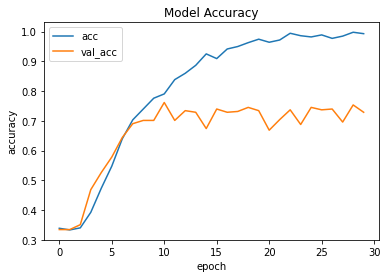

In [41]:
plt.title('Model Accuracy')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'], loc='upper left')
plt.show()

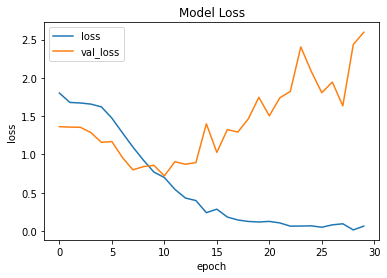

In [42]:
plt.title('Model Loss')
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

load the model and calculate the Precision and Recall

In [0]:
model_new2 = load_model('/content/drive/My Drive/plant-pathology-2020-fgvc7/models/model2.h5')

In [0]:
model_new2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=[keras.metrics.Precision(class_id=0,name='Precision_0'),
                                                                                   keras.metrics.Precision(class_id=1,name='Precision_1'),
                                                                                   keras.metrics.Precision(class_id=2,name='Precision_2'),
                                                                                   keras.metrics.Precision(class_id=3,name='Precision_3'),
                                                                                   keras.metrics.Recall(class_id=0, name='Recall_0'),
                                                                                   keras.metrics.Recall(class_id=1, name='Recall_1'),
                                                                                   keras.metrics.Recall(class_id=2, name='Recall_2'),
                                                                                   keras.metrics.Recall(class_id=3, name='Recall_3'),
                                                                                   'accuracy'])

                                                                                   
   

In [55]:
model_new_pre_rec_acc2 = model_new2.evaluate(X_test, y_test)
model_new_pre_rec_acc2
print('\nHealthy Precision:',model_new_pre_rec_acc2[1], 'Recall:',model_new_pre_rec_acc2[5],'\n\n',
      'Multiple_diseases Precision:',model_new_pre_rec_acc2[2], 'Recall:',model_new_pre_rec_acc2[6],'\n\n',
      'Rust Precision:',model_new_pre_rec_acc2[3], 'Recall:',model_new_pre_rec_acc2[7],'\n\n',
      'Scab Precision:',model_new_pre_rec_acc2[4], 'Recall:',model_new_pre_rec_acc2[8],'\n\n',
      'Total Accuracy in Test_Data:', model_new_pre_rec_acc2[9]
     )

365/365 [==============================] - 2s 6ms/step

Healthy Precision: 0.64462810754776 Recall: 0.795918345451355 

 Multiple_diseases Precision: 0.0 Recall: 0.0 

 Rust Precision: 0.9196428656578064 Recall: 0.8442623019218445 

 Scab Precision: 0.7333333492279053 Recall: 0.682170569896698 

 Total Accuracy in Test_Data: 0.7397260069847107


Accuracy and loss whith and without dropout

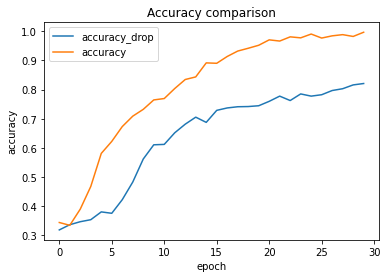

In [56]:
plt.title('Accuracy comparison')
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy_drop','accuracy'], loc='upper left')
plt.show()

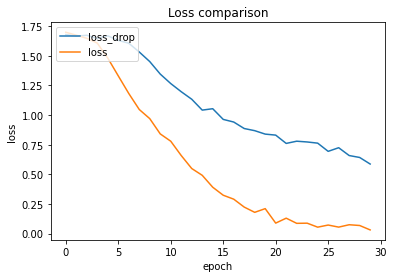

In [57]:
plt.title('Loss comparison')
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss_drop','loss'], loc='upper left')
plt.show()

#Model with different dropout values

let's take drop out values from 0.4 to 0.8

Drop_value: 0.4
Train on 1456 samples, validate on 365 samples
Epoch 1/30
1456/1456 [==============================] - 53s 37ms/step - loss: 1.7142 - accuracy: 0.3290 - val_loss: 1.3507 - val_accuracy: 0.3342
Epoch 2/30
1456/1456 [==============================] - 53s 36ms/step - loss: 1.7156 - accuracy: 0.3324 - val_loss: 1.3758 - val_accuracy: 0.3534
Epoch 3/30
1456/1456 [==============================] - 53s 36ms/step - loss: 1.6635 - accuracy: 0.3565 - val_loss: 1.3710 - val_accuracy: 0.3699
Epoch 4/30
1456/1456 [==============================] - 53s 36ms/step - loss: 1.6545 - accuracy: 0.3716 - val_loss: 1.3426 - val_accuracy: 0.4219
Epoch 5/30
1456/1456 [==============================] - 53s 36ms/step - loss: 1.6594 - accuracy: 0.4052 - val_loss: 1.3614 - val_accuracy: 0.3616
Epoch 6/30
1456/1456 [==============================] - 55s 37ms/step - loss: 1.6426 - accuracy: 0.4038 - val_loss: 1.3921 - val_accuracy: 0.3534
Epoch 7/30
1456/1456 [==============================] - 52s 3

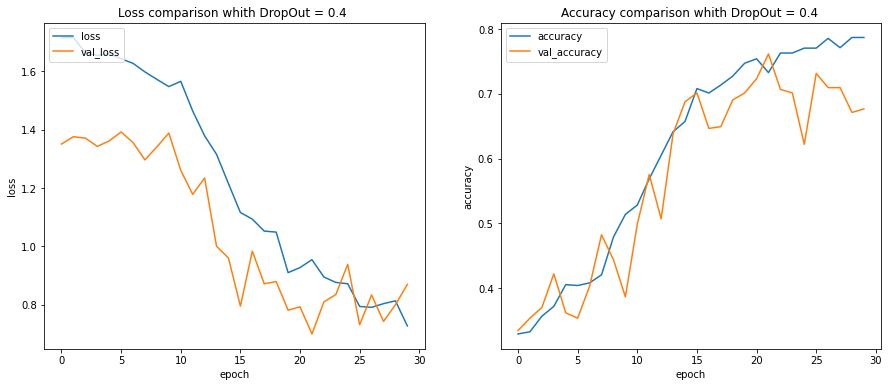

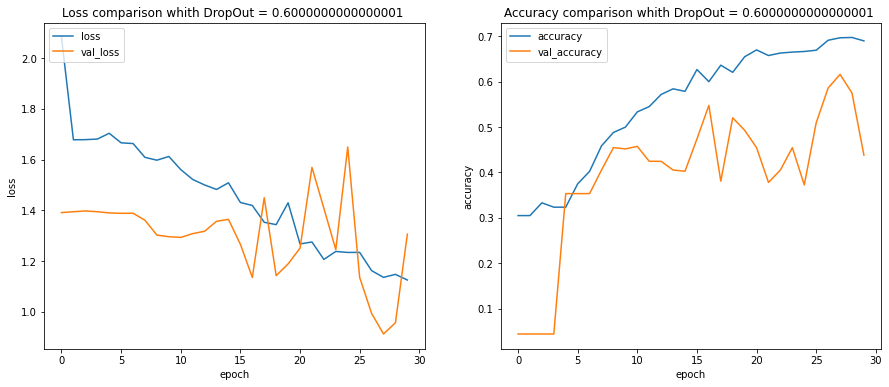

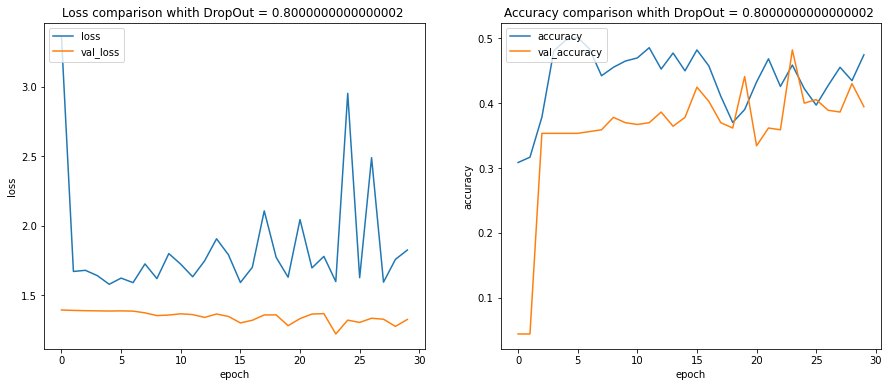

In [40]:
set_seed(np.random.seed(123))
drop_val=np.arange(0.4,1,0.2)
for i in drop_val:
  print('Drop_value:' ,i)
  model3 = Sequential()

  model3.add(Conv2D(32,(3,3),strides=2,activation='relu',input_shape=(300,300,3)))
  model3.add(MaxPooling2D((2,2)))
  model3.add(Dropout(i))

  model3.add(Conv2D(64,(3,3),activation='relu'))
  model3.add(MaxPooling2D((2,2)))
  model3.add(Dropout(i))

  model3.add(Conv2D(64,(3,3),activation='relu'))
  model3.add(MaxPooling2D((2,2)))
  model3.add(Dropout(i))

  model3.add(Conv2D(128,(3,3),activation='relu'))
  model3.add(MaxPooling2D((2,2)))
  model3.add(Dropout(i))

  model3.add(Flatten())

  model3.add(Dense(256,activation='relu'))
  model3.add(Dropout(i))


  model3.add(Dense(4,activation='softmax'))

  model3.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
  
  history3 = model3.fit(X_train,y_train, epochs=30, batch_size=32, class_weight={0:1, 1:5, 2:1, 3:1}, validation_data=(X_test,y_test)) 

  plt.figure(figsize=(15,6))

  plt.subplot(1,2,1)
  plt.title('Loss comparison whith DropOut = %s '%i)
  plt.plot(history3.history['loss'])
  plt.plot(history3.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['loss','val_loss'], loc='upper left')

  plt.subplot(1,2,2)
  plt.title('Accuracy comparison whith DropOut = %s ' %i)
  plt.plot(history3.history['accuracy'])
  plt.plot(history3.history['val_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['accuracy','val_accuracy'], loc='upper left')

                                                                        


# **Findings**

1)Using the dropout we were able to increase the accuracy from 72% to 78%.
The best dropout value is 0.25

2)As you can see from the graphs, with a dropout value starting from 0.6, the model is under-fiting, and up to 0.2, the model is over-fiting


# Feature maps

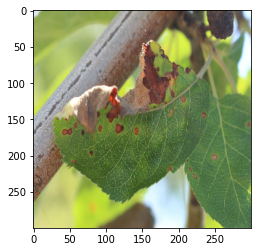

In [19]:
from keras.preprocessing import image
image_test = '/content/drive/My Drive/plant-pathology-2020-fgvc7/images/Train_1.jpg'
img = image.load_img(image_test, target_size=(300,300,3))
plt.imshow(img)

In [0]:
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr,axis=0)
img_arr/=255

In [0]:
feature_model = load_model('/content/drive/My Drive/plant-pathology-2020-fgvc7/models_dropout/model1.h5')

In [0]:
layers_output =[layer.output for layer in feature_model.layers[:11]]

In [0]:
activation_model = keras.Model(inputs = feature_model.input, outputs=layers_output)

In [17]:
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 149, 149, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0   

In [0]:
activations = activation_model.predict(img_arr)

In [0]:

layers_name=[]
for layer in feature_model.layers[:11]:
  layers_name.append(layer.name)

In [0]:
images_per_row=10

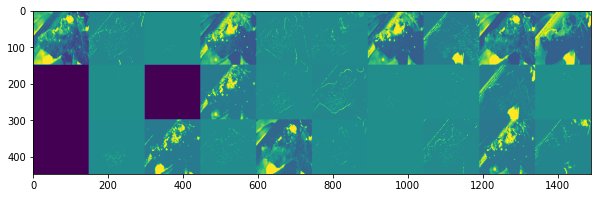

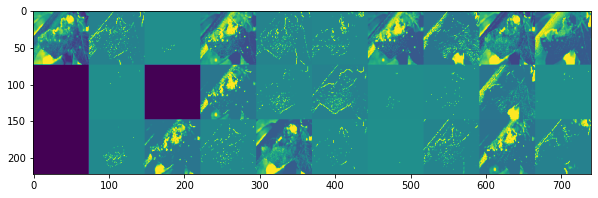

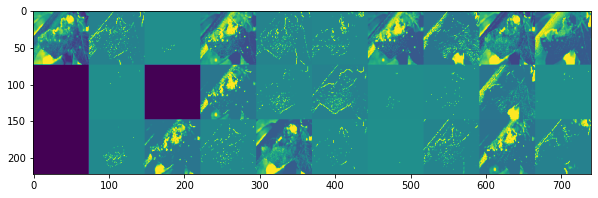

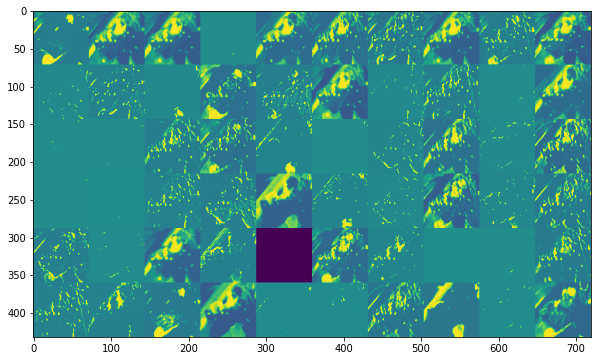

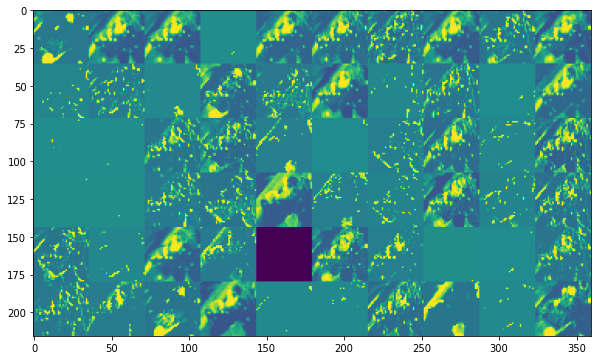

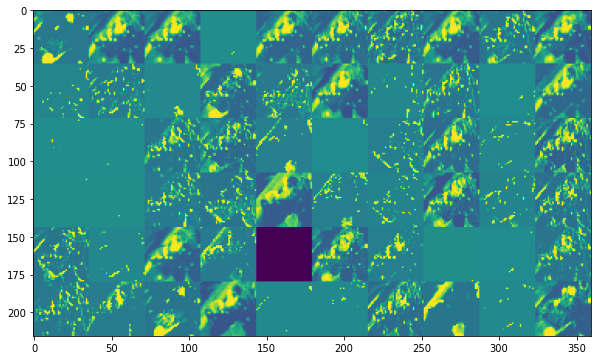

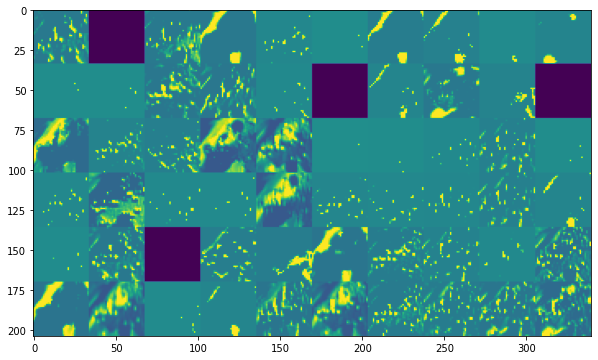

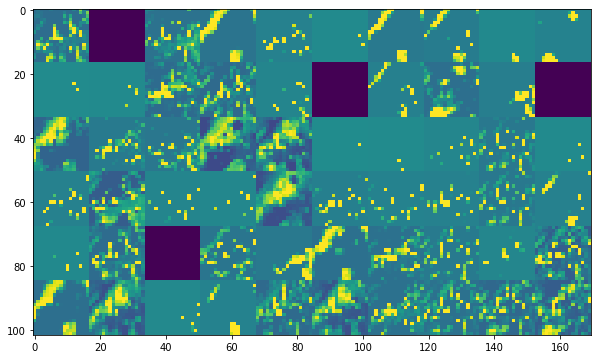

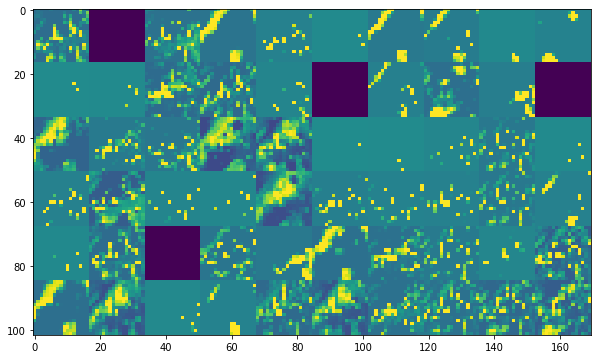

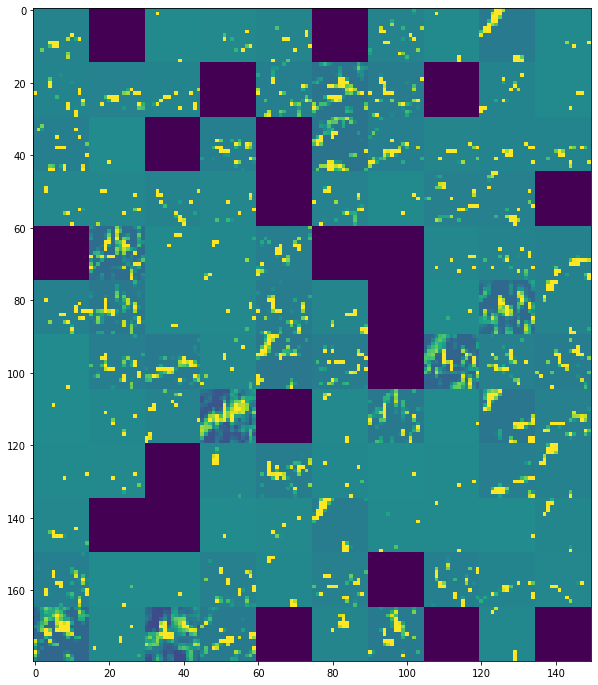

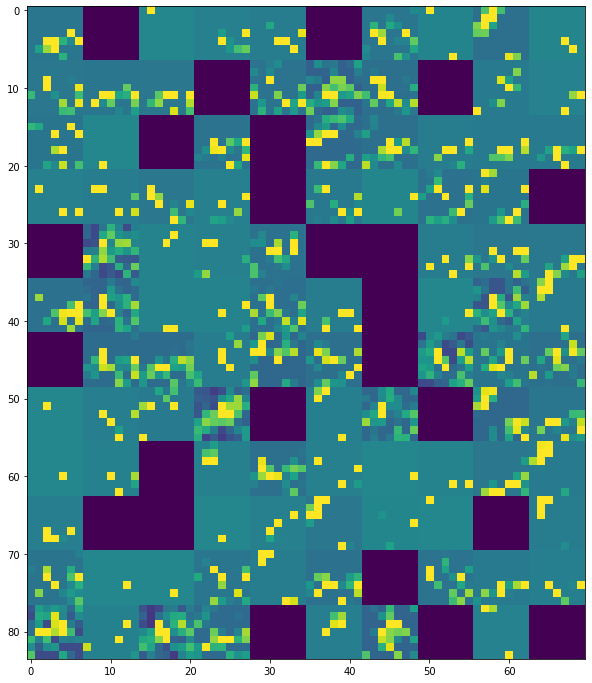

In [55]:
for layer_name, layer_activation in zip(layers_name, activations):
  n_filters = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_col=n_filters//images_per_row
  display_grid = np.zeros((n_col * size, images_per_row * size))

  for col in range(n_col):
    for row in range(images_per_row):
        channel_image = layer_activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()